# Linear Regression

In [108]:
import tensorflow as tf
import numpy as np
import time
from sklearn.model_selection import train_test_split
from utility import show_graph

## Hyperparameter

In [109]:
LEARNING_RATE = 0.5
EPOCHS = 10000

## Gen data

In [110]:
X_train = np.random.rand(100).astype(np.float32)
y_train = X_train ** 2

## Add noise to y_train

In [111]:
y_train = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_train)

## Split data into training, validation and testing

> train:val:test = 6:2:2

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, train_size=0.75)

## Build model

In [113]:
X_model = tf.placeholder(tf.float32, [None])
y_model = tf.placeholder(tf.float32, [None])
W_model = tf.Variable(tf.random_normal([1]))
b_model = tf.Variable(tf.random_normal([1]))

In [114]:
pred_model = W_model * X_model + b_model
loss = tf.reduce_mean(tf.pow((pred_model - y_model), 2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(loss)

In [115]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(EPOCHS):
        train_loss = 0.0
        start_time = time.time()
        _, step_train_loss = sess.run([train_op, loss], feed_dict={X_model:X_train, y_model:y_train})
        train_loss += step_train_loss
        
        if(epoch % 100 == 0):
            end_time = time.time()
            valid_loss = sess.run(loss, feed_dict={X_model:X_val, y_model:y_val})
            print("Time:%.1f epoch:%d train_loss:%.4f validation_loss:%.4f" %(end_time - start_time, epoch, train_loss, valid_loss))
    
    predictions, test_loss = sess.run([pred_model, loss], feed_dict={X_model:X_test, y_model:y_test})
    print("Test loss : %.4f" %(test_loss))
    #show_graph(sess.graph_def)

Time:2.5 epoch:0 train_loss:0.4685 validation_loss:0.0784
Time:0.0 epoch:100 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:200 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:300 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:400 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:500 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:600 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:700 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:800 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:900 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:1000 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:1100 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:1200 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:1300 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:1400 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:1500 train_loss:0.0105 validation_loss:0.0130
Time:0.0 epoch:1600 train_loss:0.010

## Plot Prediction

In [119]:
X_test.shape

(20,)

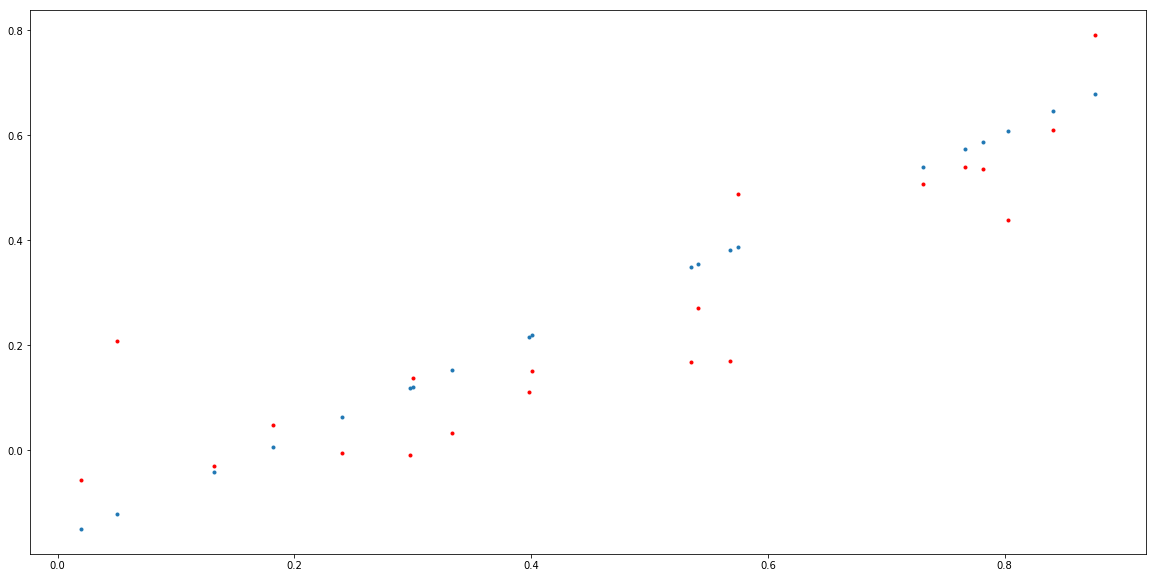

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 10))
plt.plot(X_test, y_test, 'r.')
plt.plot(X_test, predictions, '.')
plt.show()